In [113]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/svm_rbf/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498_z.csv')

In [114]:
#import random forest model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

#

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definisci il modello
model = SVC(kernel='rbf')

# Definisci la griglia dei parametri da esplorare
param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'gamma': np.linspace(0.001, 0.2, 20)
}

# Esegui la ricerca esaustiva dei parametri
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

# Stampa i migliori parametri trovati
print("Migliori parametri:")
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.011473684210526316; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.011473684210526316; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.011473684210526316; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.011473684210526316; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.021947368421052632; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.02

/tmp/ipykernel_287251/325412517.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
/tmp/ipykernel_287251/325412517.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


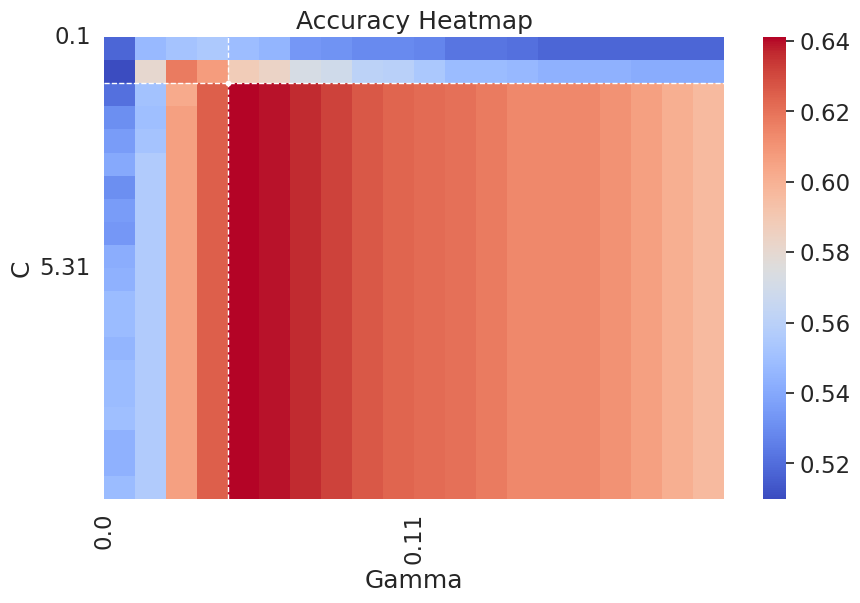

In [116]:
#visualize the results of the grid search in a heatmap

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


plt.figure(figsize=(10, 6))
sns.heatmap(results, cmap=cm.coolwarm)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.xticks(ticks=np.arange(0, len(results.columns), 10), labels=[round(x, 2) for x in results.columns[::10]])
plt.yticks(ticks=np.arange(0, len(results.index), 10), labels=[round(x, 2) for x in results.index[::10]])
plt.axhline(y=results.index.get_loc(grid_search.best_params_['C']), color='white', linestyle='dashed', linewidth=1)
plt.axvline(x=results.columns.get_loc(grid_search.best_params_['gamma']),color='white', linestyle='dashed', linewidth=1)
plt.scatter(results.columns.get_loc(grid_search.best_params_['gamma']), results.index.get_loc(grid_search.best_params_['C']), color='white', s=10)
plt.title('Accuracy Heatmap')
plt.show()


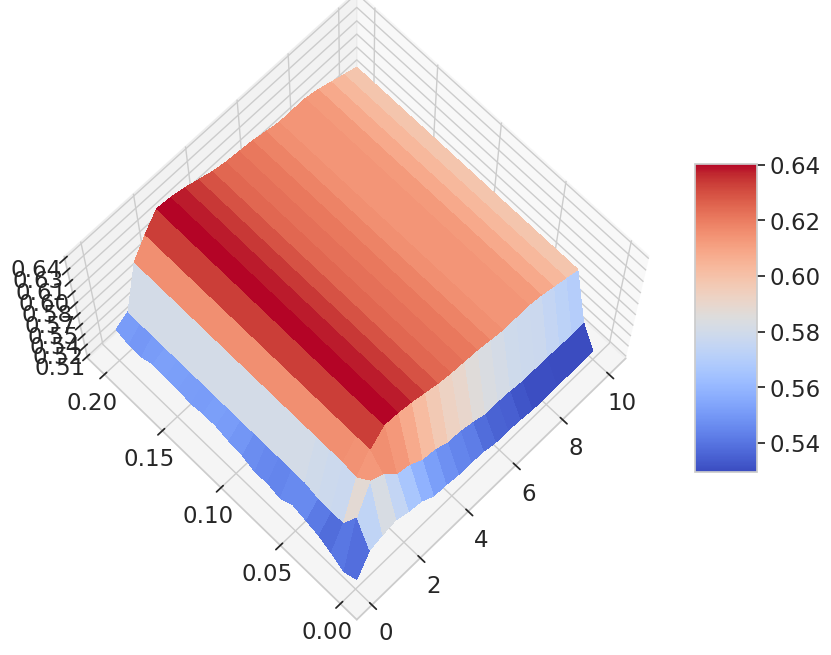

In [117]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

X, Y = np.meshgrid(results.index, results.columns)
Z = results.values

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(70, -135)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


In [118]:
for angle in range(0, 360, 2):

    plt.rcParams['figure.figsize'] = [10, 8]
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    # Set the angle of the camera
    ax.view_init(20, angle)

    # Save it
    filename = '/home/marco/DataspellProjects/thesis/output/svm_rbf/animation/' + 'grid_search_' + str(angle) + '.png'
    #plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close()
